# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, transform

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

<!-- 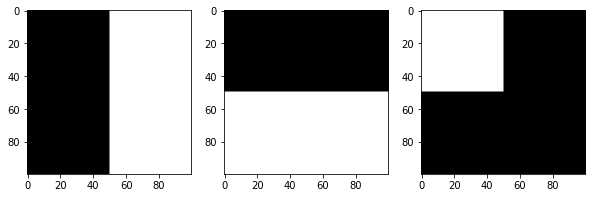 -->

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


In [ ]:
# Create a 100x100 black image (0 is for black and 255 is for white)
image1 = np.zeros((100, 100), dtype=np.uint8)
image1[:, 50:] = 255    # add white pixels to the right half of the image [row, column]

# 100x100 black image
image2 = np.zeros((100, 100), dtype=np.uint8)
image2[50:, :] = 255    # add white pixels to the bottom half of the image

#100 x 100 black image
image3 = np.zeros((100, 100), dtype=np.uint8)
image3[:50, :50] = 255  # add white square to the top left corner of the image

# Image visualization, 1x3 subplot
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
plt.imshow(image1, cmap='gray')
plt.title('Image 1')

plt.subplot(1,3,2)
plt.imshow(image2, cmap='gray')
plt.title('Image 2')

plt.subplot(1,3,3)
plt.imshow(image3, cmap='gray')
plt.title('Image 3')

plt.show()

*   Use the above three images to create the following image

<!-- 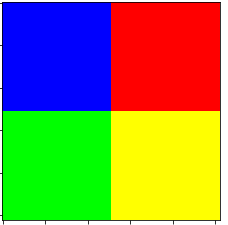 -->
*Hint: Remember channels and color spaces*

In [ ]:
composite_image = np.zeros((100, 100,3), dtype=np.uint8)
composite_image[:,:,0] = image1
composite_image[:,:,1] = image2
composite_image[:,:,2] = image3

plt.imshow(composite_image)
plt.title('Composite Image')
#hide axis
plt.axis('off')
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

<!-- 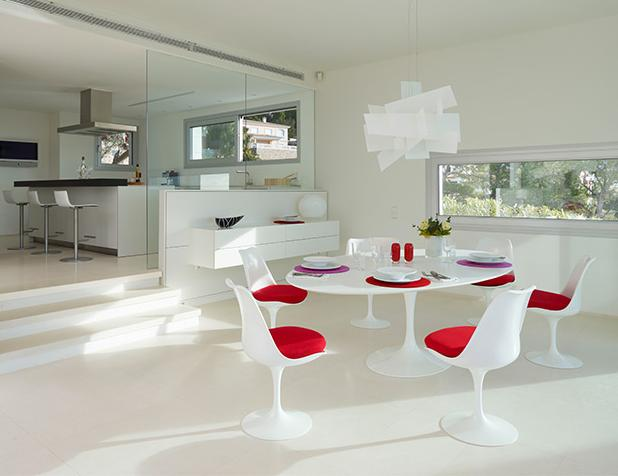 -->

*   Extract individual channels and plot them using matplotlib subplot.



In [ ]:
# open image
sillas = io.imread('images/sillas.jpg')

# extract the red channel
red_channel = sillas[:,:,0]
green_channel = sillas[:,:,1]
blue_channel = sillas[:,:,2]

# Image visualizations
plt.figure(figsize=(14, 5))

plt.subplot(1,3,1)
plt.imshow(red_channel, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(green_channel, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blue_channel, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [ ]:
# change red to blue and blue to red
sillas_blue = sillas.copy()
sillas_blue[:,:,2] = sillas[:,:,0]
# sillas_blue[:,:,0] = sillas[:,:,2]

# Image visualizations
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.imshow(sillas)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sillas_blue)
plt.title('Blue Channel as Red Channel')
plt.axis('off')

plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

<!-- 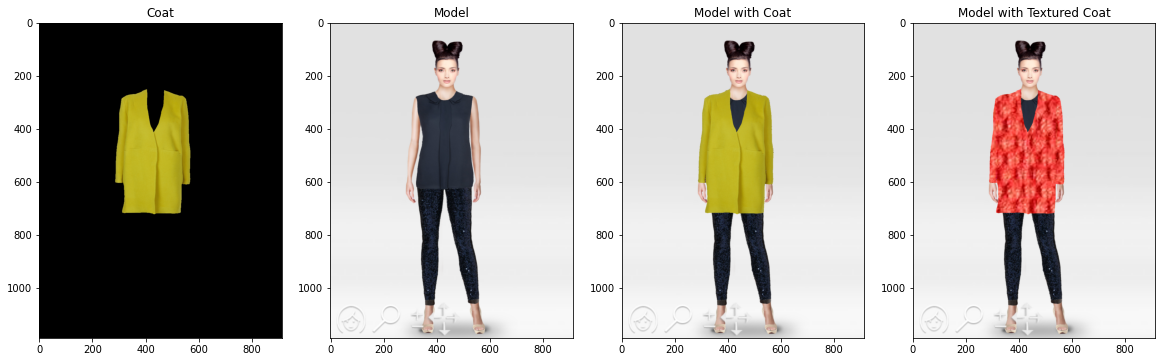 -->

In [ ]:
# solution
coat = io.imread('images/coat.png')
model = io.imread('images/model.png')
texture1 = io.imread('images/texture.png')

# Visualize the images
plt.figure(figsize=(8, 5))

plt.subplot(1,2,1)
plt.imshow(coat)

plt.subplot(1,2,2)
plt.imshow(model)

plt.show()


In [ ]:
# put coat on model
model_copy = model.copy()

# before asking github copilot, because i assumed this was not optimal (it worked, tho)...
# for row in range(len(coat)):
#     for column in range(len(coat[0])):
#         for color in range(0,3):
#             if coat[row,column,color] != 0:
#                 model_copy[row,column, color] = coat[row, column, color]


# after asking github copilot 
non_zero_mask = coat != 0
model_copy[non_zero_mask] = coat[non_zero_mask]
print(coat[non_zero_mask].shape)
plt.imshow(model_copy)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

# use coat as mask and put texture on coat
model_copy = model.copy()
model_copy = model_copy[:,:,:3]

coat_copy = coat.copy()
coat_copy = coat_copy[:,:,:3]
coat_mask = coat_copy != 0

textures = [io.imread('images/texture.png'), io.imread('images/texture2.png'), io.imread('images/texture3.jpg')]

plt.figure(figsize=(15, 5))

# resize texture to coat size
for i, texture in enumerate(textures):
    plt.subplot(1, 3, i+1)
    texture1_copy = texture.copy()
    texture1_resized = transform.resize(texture1_copy, model.shape[:2], anti_aliasing=True)
    texture1_resized = (texture1_resized * 255).astype(np.uint8)  # Convert back to uint8 if necessary

    # Ensure the resized texture has the same number of channels as the coat
    if texture1_resized.shape[2] != coat_copy.shape[2]:
        texture1_resized = np.dstack([texture1_resized] * coat_copy.shape[2])

    # apply texture to coat
    model_copy[coat_mask] = texture1_resized[coat_mask]
    
    plt.imshow(model_copy)
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [ ]:
# solution
from skimage.color import rgb2gray
astro = data.astronaut()

#grayscale
astro_gray = rgb2gray(astro)

# image histogram
hist, bins = exposure.histogram(astro_gray)

# subplots
plt.figure(figsize=(15, 5))


# plot histogram
plt.subplot(1,2,1)
plt.plot(bins, hist, lw=2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# plot image
plt.subplot(1,2,2)
plt.imshow(astro_gray, cmap='gray')
plt.title('Astronaut Image')

plt.tight_layout()
plt.show()



*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

In [ ]:
# solution
hist, bins = exposure.histogram(astro_gray, nbins=8)

# plot histogram
plt.plot(bins, hist, lw=1, color='r')
plt.hist(astro_gray.ravel(), bins=8, range=[0, 1], color='b', alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()

*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?

**Solution**

> When one changes the bin count, the inference of the histogram changes. With a very large number of bins, one may think that the image is almost completely black, but with lower bins we get another idea of the image and we can see that the image is not mainly black, but with a variety of intensities. 
>
> The correct bin count is the one that gives a good representation of the image. It should not be too low or too high. If it is too low, we may lose information about the image and if it is too high, we may get a lot of noise in the histogram.


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


In [ ]:
red_channel = astro[:,:,0]
green_channel = astro[:,:,1]
blue_channel = astro[:,:,2]
bins =15

# histogram for each channel
plt.figure(figsize=(15, 5))
plt.hist(astro.ravel(), bins=bins, range=[0, 256], color='k', alpha=0.2, label='All Channels')
plt.hist(blue_channel.ravel(), bins=bins, range=[0, 256], color='b', alpha=0.9, label='Blue Channel')
plt.hist(green_channel.ravel(), bins=bins, range=[0, 256], color='g', alpha=0.7, label='Green Channel')
plt.hist(red_channel.ravel(), bins=bins, range=[0, 256], color='r', alpha=0.5, label='Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()

### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [ ]:
# solution
aqua = io.imread('images/aquatermi_lowcontrast.jpg')

plt.figure(figsize=(15, 9))

plt.subplot(2,2,1)
hist, bins = exposure.histogram(aqua, channel_axis=None)
plt.plot(bins, hist, lw=2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(aqua) 
plt.title('Original Image')

# histogram equalization
plt.subplot(2,2,3)
aqua_eq = exposure.equalize_hist(aqua)
hist, bins = exposure.histogram(aqua_eq, channel_axis=None)
plt.plot(bins, hist, lw=2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram Equalization')

plt.subplot(2,2,4)
plt.imshow(aqua_eq)
plt.title('Equalized Image')

plt.tight_layout()
plt.show()




*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

> Linear contrast stretch is a simple technique where the pixel values are stretched to the full range of intensities. This is done by finding the minimum and maximum pixel values in the image and then stretching the pixel values to the full range. This is a simple technique and does not take into account the distribution of pixel values in the image.
>
> Histogram equalization is a technique where the cumulative distribution function (CDF) of the pixel values is computed and then the pixel values are stretched such that the CDF of the pixel values is a straight line. This technique takes into account the distribution of pixel values in the image and hence is more effective in enhancing the contrast of the image.

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



In [ ]:
# linear contrast stretch
def contrast_stretching(gray_image, bin_count=None):
    min_val, max_val = np.percentile(gray_image, (2, 98))
    # min_val = np.min(gray_image)
    # max_val = np.max(gray_image)

    # Apply linear contrast stretch
    stretched_image = (gray_image - min_val) * (255 / (max_val - min_val))
    stretched_image = stretched_image.astype(np.uint8)
    
    return stretched_image

# grayscale image
gray_image = rgb2gray(aqua)

# contrast stretching
stretched_image = contrast_stretching(gray_image)

plt.figure(figsize=(15, 9))

plt.subplot(2,2,1)
hist, bins = exposure.histogram(gray_image)
plt.plot(bins, hist, lw=2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.subplot(2,2,2)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,3)
hist, bins = exposure.histogram(stretched_image)
plt.plot(bins, hist, lw=2)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram after contrast stretching')

plt.subplot(2,2,4)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')

plt.tight_layout()
plt.show()

# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




In [ ]:
# solution
coins = data.coins()

plt.figure(figsize=(17, 7))

plt.subplot(1,4,1)
plt.imshow(coins, cmap='gray')
plt.title('Original Image')

plt.subplot(1,4,3)
selem = morphology.disk(20)
coins_closed = filters.rank.mean(coins, selem)
plt.imshow(coins_closed, cmap='gray')
plt.title('Closing Operation (selem=disk(20))')

plt.subplot(1,4,4)
selem = morphology.disk(30)
coins_closed = filters.rank.mean(coins, selem)
plt.imshow(coins_closed, cmap='gray')
plt.title('Closing Operation (selem=disk(30))')

plt.subplot(1,4,2)
selem = morphology.disk(10)
coins_closed = filters.rank.mean(coins, selem)
plt.imshow(coins_closed, cmap='gray')
plt.title('Closing Operation (selem=disk(10))')

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [208]:
def plot_selems(image, selem_list,selem_name):
    """
    Plot the structuring elements and the closing operation of an image.

    Parameters
    ----------
    image : ndarray
        Input image.
    selem_list : list
        List of structuring elements to be plotted.
    radius : int
        Radius of the structuring elements.
    """
    plt.figure(figsize=(15, 5))

    for i, selem in enumerate(selem_list):

        plt.subplot(2, len(selem_list), i+1)
        plt.imshow(selem, cmap='gray')
        plt.title(f"{selem_name[i]}")
        plt.axis('off')

        plt.subplot(2, len(selem_list), i+1+len(selem_list))
        coins_closed = filters.rank.mean(image, selem)
        plt.imshow(coins_closed, cmap='gray')
        plt.title('Closing Operation')
        

    plt.tight_layout()
    plt.show()


In [ ]:
# Define the structuring elements
rad = 20
selem_name= ['square','rectangle', 'star', 'diamond']
selem_list = [morphology.square(rad), morphology.rectangle(int(rad/2), rad), morphology.star(rad), morphology.diamond(rad)]

# Plot the structuring elements and the closing operation
plot_selems(coins, selem_list, selem_name)

In [ ]:
# gaussian filter
sigmas = [1,3,5,7,9,15,20, 30]

plt.figure(figsize=(20, 8))

for i, sigma in enumerate(sigmas):
    plt.subplot(2, 4, i+1)
    filtered_image = filters.gaussian(coins, sigma=sigma)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Sigma={sigma}')

plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

> The bigger the radius the more smoothing effect we get, but increasing too much the radius we may loose all the datails. 


*   What is the observed behaviour with difference in the structuring element?



**Solution**

> The smoothing efect changes depending on the structuring element. The blurriness of the image changes depending on the structuring element.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

> The mean filter is a simple filter that takes the average of the pixels in the neighborhood of the pixel being processed. The gaussian filter is a filter that takes the weighted average of the pixels in the neighborhood of the pixel being processed. The gaussian filter gives more importance to the pixels that are closer to the pixel being processed.
>
> The mean filter is used when we want to remove noise from the image, but we do not want to lose the details of the image. The gaussian filter is used when we want to remove noise from the image, but we do not want to lose the details of the image and we want to give more importance to the pixels that are closer to the pixel being processed.